# Exercise 5. Pandas

### Tone Alsvik Finstad

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every x BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
import numpy as np
import pandas as pd

### 1. Create a dataframe


Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [12]:
file_name = "./data/data_000637.txt"
data = pd.read_csv(file_name)

def get_dataframe(N):
    return data[:N]
data_N=get_dataframe(10000)
data_N

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11
9996,1,0,60,3869200267,701,5
9997,1,0,59,3869200267,707,23
9998,1,0,63,3869200267,706,15


### 2. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.



In [115]:
import matplotlib.pyplot as plt
BX=data["BX_COUNTER"]
BX_max=data["BX_COUNTER"].max()
    
print(f"The number of  BX in a ORBIT is {BX_max + 1}") #add one because we count from 0

The number of  BX in a ORBIT is 3564


### 3. Create column with absolute time

Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.




In [55]:
data["Abs_time (ns)"]=(25/30)*data["TDC_MEAS"]+25*data["BX_COUNTER"]+25*BX_max*data["ORBIT_CNT"]
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs_time (ns)
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.446500e+14
1310716,1,1,4,3869211171,763,11,3.446500e+14
1310717,1,0,64,3869211171,764,0,3.446500e+14
1310718,1,0,139,3869211171,769,0,3.446500e+14


### 4. Find duration of the data 


Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.




In [114]:
time=data.at[1310719,"Abs_time (ns)"]-data.at[0,"Abs_time (ns)"]
print(pd.Timedelta(f"{time}ns"))
print(f"Time in ns: {time}")

0 days 00:00:00.980140
Time in ns: 980140993.3125


### 5. Find noisy channels


Use the .groupby() method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)




In [117]:
data.groupby(["TDC_CHANNEL"]).count().sort_values(["ORBIT_CNT"],ascending=False)[:3]

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs_time (ns)
TDC_CHANNEL,,,,,,
139,108059,108059,108059,108059,108059,108059
64,66020,66020,66020,66020,66020,66020
63,64642,64642,64642,64642,64642,64642


The most noisy channels are 139, 64 and 63

### 6. Count non-empty orbits


Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).



In [122]:
print("Non-empty orbits: ",set(data_N["ORBIT_CNT"]))
print(f"The number of non-empty orbits: ",len(set(data_N["ORBIT_CNT"])))

Non-empty orbits:  {3869200167, 3869200168, 3869200169, 3869200170, 3869200171, 3869200172, 3869200173, 3869200174, 3869200175, 3869200176, 3869200177, 3869200178, 3869200179, 3869200180, 3869200181, 3869200182, 3869200183, 3869200184, 3869200185, 3869200186, 3869200187, 3869200188, 3869200189, 3869200190, 3869200191, 3869200192, 3869200193, 3869200194, 3869200195, 3869200196, 3869200197, 3869200198, 3869200199, 3869200200, 3869200201, 3869200202, 3869200203, 3869200204, 3869200205, 3869200206, 3869200207, 3869200208, 3869200209, 3869200210, 3869200211, 3869200212, 3869200213, 3869200214, 3869200215, 3869200216, 3869200217, 3869200218, 3869200219, 3869200220, 3869200221, 3869200222, 3869200223, 3869200224, 3869200225, 3869200226, 3869200227, 3869200228, 3869200229, 3869200230, 3869200231, 3869200232, 3869200233, 3869200234, 3869200235, 3869200236, 3869200237, 3869200238, 3869200239, 3869200240, 3869200241, 3869200242, 3869200243, 3869200244, 3869200245, 3869200246, 3869200247, 38692002

### 7. Count unique orbits

Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.



In [123]:
df_139=data_N[data_N["TDC_CHANNEL"]==139]
print(len(df_139))

print("Unique orbits: ",set(df_139["ORBIT_CNT"]))
print("Number of unique orbits: ",len(set(df_139["ORBIT_CNT"])))



860
Unique orbits:  {3869200167, 3869200168, 3869200169, 3869200170, 3869200171, 3869200172, 3869200173, 3869200174, 3869200175, 3869200176, 3869200177, 3869200178, 3869200179, 3869200180, 3869200181, 3869200182, 3869200183, 3869200184, 3869200185, 3869200186, 3869200187, 3869200188, 3869200189, 3869200190, 3869200191, 3869200192, 3869200193, 3869200194, 3869200195, 3869200196, 3869200197, 3869200198, 3869200199, 3869200200, 3869200201, 3869200202, 3869200203, 3869200204, 3869200205, 3869200206, 3869200207, 3869200208, 3869200209, 3869200210, 3869200211, 3869200212, 3869200213, 3869200214, 3869200215, 3869200216, 3869200217, 3869200218, 3869200219, 3869200220, 3869200221, 3869200222, 3869200223, 3869200224, 3869200225, 3869200226, 3869200227, 3869200228, 3869200229, 3869200230, 3869200231, 3869200232, 3869200233, 3869200234, 3869200235, 3869200236, 3869200237, 3869200238, 3869200239, 3869200240, 3869200241, 3869200242, 3869200243, 3869200244, 3869200245, 3869200246, 3869200247, 3869200

### 8. Create two Series 


Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.




In [104]:
df_0=data_N[data_N["FPGA"]==0]
print(len(df_0))
df_1=data_N[data_N["FPGA"]==1]
print(len(df_1))

serie_0=pd.Series(df_0.groupby(["TDC_CHANNEL"]).count()["HEAD"],index=df_0.groupby(["TDC_CHANNEL"]).count().index)
print(serie_1)
serie_1=pd.Series(df_1.groupby(["TDC_CHANNEL"]).count()["HEAD"],index=df_1.groupby(["TDC_CHANNEL"]).count().index)
print(serie_1)


7015
2985
TDC_CHANNEL
1      237
2      250
3      193
4      200
5      128
      ... 
125      2
126      1
127     10
128     11
139    261
Name: HEAD, Length: 115, dtype: int64
TDC_CHANNEL
1      237
2      250
3      193
4      200
5      128
      ... 
125      2
126      1
127     10
128     11
139    261
Name: HEAD, Length: 115, dtype: int64


### 9. Optional: Create two histograms


Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

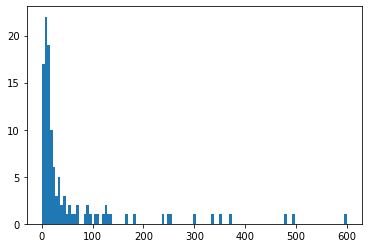

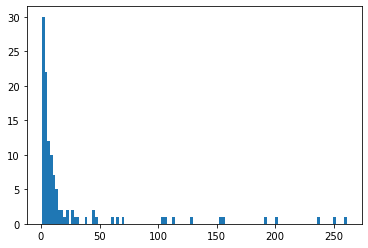

In [110]:
plt.hist(serie_0, bins=len(serie_0))
plt.show()
plt.hist(serie_1, bins=len(serie_1))
plt.show()